In [1]:
import hashlib
import time
import csv

# A simple encryption
def encrypt(plaintext, key):
    return hashlib.sha256((plaintext + key).encode()).hexdigest()

def decrypt(ciphertext, key, plaintext):
    return encrypt(plaintext, key) == ciphertext

plaintext = "hello"
correct_key = "abcd"
ciphertext = encrypt(plaintext, correct_key) 

def brute_force_16bit_key(ciphertext, plaintext):
    for key_int in range(0, 2**16):
        key = f"{key_int:04x}"
        if decrypt(ciphertext, key, plaintext):
            return key
    return None

def measure_execution_time(repetitions, output_file):
    times = []
    for i in range(repetitions):
        print(f"Run {i + 1}/{repetitions}...")
        start_time = time.time()
        found_key = brute_force_16bit_key(ciphertext, plaintext)
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time*1000)
        print(f"Run {i + 1} completed: Found Key={found_key}, Time={elapsed_time:.4f}ms")
    
    with open(output_file, mode="w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(["Run", "Time (ms)"])
        for idx, t in enumerate(times, start=1):
            writer.writerow([idx, t])
    print(f"Results saved to {output_file}")

measure_execution_time(385, "results.csv")

Run 1/385...
Run 1 completed: Found Key=abcd, Time=0.0822ms
Run 2/385...
Run 2 completed: Found Key=abcd, Time=0.0766ms
Run 3/385...
Run 3 completed: Found Key=abcd, Time=0.0738ms
Run 4/385...
Run 4 completed: Found Key=abcd, Time=0.0946ms
Run 5/385...
Run 5 completed: Found Key=abcd, Time=0.0858ms
Run 6/385...
Run 6 completed: Found Key=abcd, Time=0.0811ms
Run 7/385...
Run 7 completed: Found Key=abcd, Time=0.0715ms
Run 8/385...
Run 8 completed: Found Key=abcd, Time=0.0847ms
Run 9/385...
Run 9 completed: Found Key=abcd, Time=0.0834ms
Run 10/385...
Run 10 completed: Found Key=abcd, Time=0.0826ms
Run 11/385...
Run 11 completed: Found Key=abcd, Time=0.0835ms
Run 12/385...
Run 12 completed: Found Key=abcd, Time=0.0759ms
Run 13/385...
Run 13 completed: Found Key=abcd, Time=0.0899ms
Run 14/385...
Run 14 completed: Found Key=abcd, Time=0.0874ms
Run 15/385...
Run 15 completed: Found Key=abcd, Time=0.0851ms
Run 16/385...
Run 16 completed: Found Key=abcd, Time=0.0769ms
Run 17/385...
Run 17 compl

Run 135 completed: Found Key=abcd, Time=0.0858ms
Run 136/385...
Run 136 completed: Found Key=abcd, Time=0.0811ms
Run 137/385...
Run 137 completed: Found Key=abcd, Time=0.0798ms
Run 138/385...
Run 138 completed: Found Key=abcd, Time=0.0821ms
Run 139/385...
Run 139 completed: Found Key=abcd, Time=0.0722ms
Run 140/385...
Run 140 completed: Found Key=abcd, Time=0.0863ms
Run 141/385...
Run 141 completed: Found Key=abcd, Time=0.0792ms
Run 142/385...
Run 142 completed: Found Key=abcd, Time=0.0873ms
Run 143/385...
Run 143 completed: Found Key=abcd, Time=0.0818ms
Run 144/385...
Run 144 completed: Found Key=abcd, Time=0.0841ms
Run 145/385...
Run 145 completed: Found Key=abcd, Time=0.0795ms
Run 146/385...
Run 146 completed: Found Key=abcd, Time=0.0842ms
Run 147/385...
Run 147 completed: Found Key=abcd, Time=0.0877ms
Run 148/385...
Run 148 completed: Found Key=abcd, Time=0.0815ms
Run 149/385...
Run 149 completed: Found Key=abcd, Time=0.0664ms
Run 150/385...
Run 150 completed: Found Key=abcd, Time=

Run 265 completed: Found Key=abcd, Time=0.0850ms
Run 266/385...
Run 266 completed: Found Key=abcd, Time=0.0839ms
Run 267/385...
Run 267 completed: Found Key=abcd, Time=0.0811ms
Run 268/385...
Run 268 completed: Found Key=abcd, Time=0.0829ms
Run 269/385...
Run 269 completed: Found Key=abcd, Time=0.0871ms
Run 270/385...
Run 270 completed: Found Key=abcd, Time=0.0815ms
Run 271/385...
Run 271 completed: Found Key=abcd, Time=0.0809ms
Run 272/385...
Run 272 completed: Found Key=abcd, Time=0.0842ms
Run 273/385...
Run 273 completed: Found Key=abcd, Time=0.0850ms
Run 274/385...
Run 274 completed: Found Key=abcd, Time=0.0820ms
Run 275/385...
Run 275 completed: Found Key=abcd, Time=0.0803ms
Run 276/385...
Run 276 completed: Found Key=abcd, Time=0.0817ms
Run 277/385...
Run 277 completed: Found Key=abcd, Time=0.0821ms
Run 278/385...
Run 278 completed: Found Key=abcd, Time=0.0829ms
Run 279/385...
Run 279 completed: Found Key=abcd, Time=0.0845ms
Run 280/385...
Run 280 completed: Found Key=abcd, Time=

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

file_path = 'results.csv' 
data = pd.read_csv(file_path)

time_data = data.iloc[:, 1] 
time_data = time_data.dropna() 

mean = time_data.mean()
std_dev = time_data.std()
print(f"Mean: {mean:.2f}, Standard Deviation: {std_dev:.2f}")

Mean: 82.60, Standard Deviation: 3.99


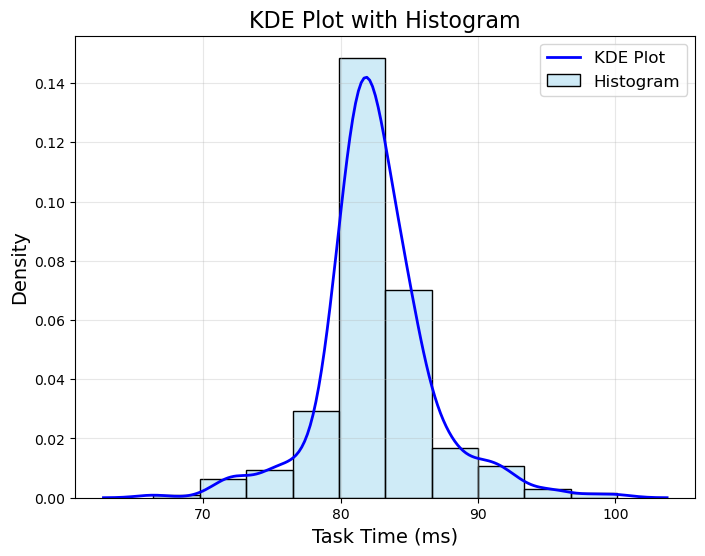

In [18]:
plt.figure(figsize=(8, 6))

sns.kdeplot(time_data, color='blue', linewidth=2, label='KDE Plot')

sns.histplot(time_data, bins=10, kde=False, color='skyblue', alpha=0.4, label='Histogram',stat="density")

plt.title('KDE Plot with Histogram', fontsize=16)
plt.xlabel('Task Time (ms)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

plt.show()

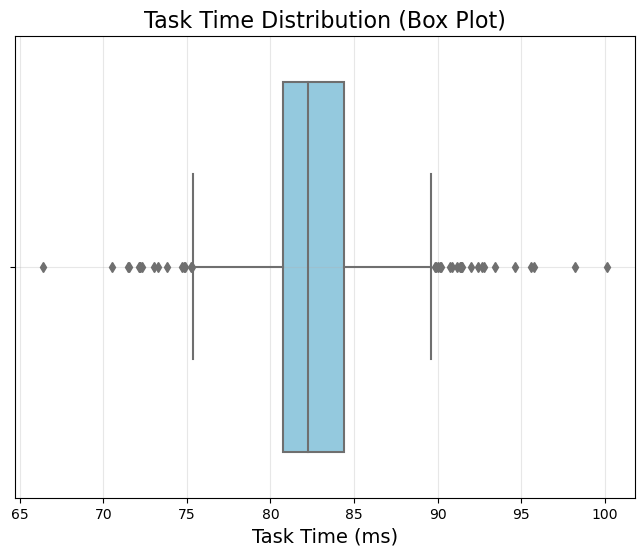

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=time_data, color='skyblue')
plt.title('Task Time Distribution (Box Plot)', fontsize=16)
plt.xlabel('Task Time (ms)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()